In [1]:
import duckdb
import polars as pl
import os
import pyarrow
import json
import matplotlib.pyplot as plt

In [13]:
ratings_ = pl.read_csv(r'C:\Users\marti\OneDrive\Documentos\IMS_EDSA\B.D.F\ml_finais\ratings_final.csv')
moviegenres = pl.read_csv(r'C:\Users\marti\OneDrive\Documentos\IMS_EDSA\B.D.F\ml_finais\moviegenres_final.csv')
moviedates = pl.read_csv(r'C:\Users\marti\OneDrive\Documentos\IMS_EDSA\B.D.F\ml_finais\moviedates_final.csv')
tags = pl.read_csv(r'C:\Users\marti\OneDrive\Documentos\IMS_EDSA\B.D.F\ml_finais\tags_final.csv')
genreratings = pl.read_csv(r'C:\Users\marti\OneDrive\Documentos\IMS_EDSA\B.D.F\ml_finais\genre_ratings.csv')

ratings = pl.read_csv(r"C:\Users\marti\Downloads\ml-32m\ml-32m\ratings.csv")
links = pl.read_csv(r"C:\Users\marti\Downloads\ml-32m\ml-32m\links.csv")

In [9]:
import csv

path = r"C:\Users\marti\OneDrive\Documentos\IMS_EDSA\B.D.F\ml_finais\tmdb_5000_movies.csv"

with open(path, "r", encoding="utf8") as f:
    reader = csv.reader(f)
    columns = next(reader)   # header row


In [10]:
import polars as pl

dtype_dict = {col: pl.Utf8 for col in columns}


In [11]:
metadata_tmdb = pl.read_csv(
    path,
    dtypes=dtype_dict,     # EVERY column is a string
    ignore_errors=True,    # skip invalid rows if any
    try_parse_dates=False  # prevents date inference errors
)


C:\Users\marti\AppData\Local\Temp\ipykernel_28840\4225689001.py:1: DeprecationWarning: the argument `dtypes` for `read_csv` is deprecated. It was renamed to `schema_overrides` in version 0.20.31.
  metadata_tmdb = pl.read_csv(


In [12]:
metadata_tmdb.head()

budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""237000000""","""[{""id"": 28, ""name"": ""Action""},…","""http://www.avatarmovie.com/""","""19995""","""[{""id"": 1463, ""name"": ""culture…","""en""","""Avatar""","""In the 22nd century, a paraple…","""150.437577""","""[{""name"": ""Ingenious Film Part…","""[{""iso_3166_1"": ""US"", ""name"": …","""2009-12-10""","""2787965087""","""162""","""[{""iso_639_1"": ""en"", ""name"": ""…","""Released""","""Enter the World of Pandora.""","""Avatar""","""7.2""","""11800"""
"""300000000""","""[{""id"": 12, ""name"": ""Adventure…","""http://disney.go.com/disneypic…","""285""","""[{""id"": 270, ""name"": ""ocean""},…","""en""","""Pirates of the Caribbean: At W…","""Captain Barbossa, long believe…","""139.082615""","""[{""name"": ""Walt Disney Picture…","""[{""iso_3166_1"": ""US"", ""name"": …","""2007-05-19""","""961000000""","""169""","""[{""iso_639_1"": ""en"", ""name"": ""…","""Released""","""At the end of the world, the a…","""Pirates of the Caribbean: At W…","""6.9""","""4500"""
"""245000000""","""[{""id"": 28, ""name"": ""Action""},…","""http://www.sonypictures.com/mo…","""206647""","""[{""id"": 470, ""name"": ""spy""}, {…","""en""","""Spectre""","""A cryptic message from Bond’s …","""107.376788""","""[{""name"": ""Columbia Pictures"",…","""[{""iso_3166_1"": ""GB"", ""name"": …","""2015-10-26""","""880674609""","""148""","""[{""iso_639_1"": ""fr"", ""name"": ""…","""Released""","""A Plan No One Escapes""","""Spectre""","""6.3""","""4466"""
"""250000000""","""[{""id"": 28, ""name"": ""Action""},…","""http://www.thedarkknightrises.…","""49026""","""[{""id"": 849, ""name"": ""dc comic…","""en""","""The Dark Knight Rises""","""Following the death of Distric…","""112.31295""","""[{""name"": ""Legendary Pictures""…","""[{""iso_3166_1"": ""US"", ""name"": …","""2012-07-16""","""1084939099""","""165""","""[{""iso_639_1"": ""en"", ""name"": ""…","""Released""","""The Legend Ends""","""The Dark Knight Rises""","""7.6""","""9106"""
"""260000000""","""[{""id"": 28, ""name"": ""Action""},…","""http://movies.disney.com/john-…","""49529""","""[{""id"": 818, ""name"": ""based on…","""en""","""John Carter""","""John Carter is a war-weary, fo…","""43.926995""","""[{""name"": ""Walt Disney Picture…","""[{""iso_3166_1"": ""US"", ""name"": …","""2012-03-07""","""284139100""","""132""","""[{""iso_639_1"": ""en"", ""name"": ""…","""Released""","""Lost in our world, found in an…","""John Carter""","""6.1""","""2124"""


In [14]:
ratings.head()

userId,movieId,rating,timestamp
i64,i64,f64,i64
1,17,4.0,944249077
1,25,1.0,944250228
1,29,2.0,943230976
1,30,5.0,944249077
1,32,5.0,943228858


In [15]:
links.head()

movieId,imdbId,tmdbId
i64,i64,i64
1,114709,862
2,113497,8844
3,113228,15602
4,114885,31357
5,113041,11862


In [16]:
# 1. Remove duplicates by movie id
unique_movies = metadata_tmdb.unique(subset=["id"])

# 2. Convert budget column from string → integer
unique_movies = unique_movies.with_columns(
    pl.col("budget")
      .cast(pl.UInt64, strict=False)   
      .fill_null(0)                    # replace failed conversions with 0
)

# 3. Sum the budget
total_budget = unique_movies["budget"].sum()

total_budget


139503326521

In [25]:
# Calculate total budget per genre from metadata_tmdb
import polars as pl
import json

# 1. Deduplicate movies by id (IMPORTANT: remove any duplicate films)
unique_movies = metadata_tmdb.unique(subset=["id"])

# 2. Convert budget to integer (handle conversion errors)
unique_movies = unique_movies.with_columns(
    pl.col("budget")
      .cast(pl.UInt64, strict=False)   
      .fill_null(0)
)

# 3. Parse JSON genres - convert string to list of dicts, then extract genre names
def parse_genres(genres_str):
    """Parse JSON genres string and extract genre names"""
    if not genres_str or genres_str == "":
        return []
    try:
        genres_list = json.loads(genres_str)
        return [genre['name'] for genre in genres_list if 'name' in genre]
    except:
        return []

# Apply the function to parse genres
unique_movies = unique_movies.with_columns(
    pl.col("genres").map_elements(parse_genres, return_dtype=pl.List(pl.Utf8)).alias("genres_list")
)

# 4. Explode genres so each movie-genre pair is a separate row
exploded_genres = unique_movies.explode("genres_list").rename({"genres_list": "genre_name"})

# 5. Group by genre and sum budgets
budget_per_genre = (
    exploded_genres
    .group_by("genre_name")
    .agg([
        pl.col("budget").sum().alias("total_budget"),
        pl.col("id").count().alias("num_movies"),
        pl.col("budget").mean().round(2).alias("avg_budget_per_movie")
    ])
    .sort("total_budget", descending=True)
)

print("Total Budget Per Genre (FULL TABLE)")
print("=" * 100)
# Display full table without truncation
with pl.Config(tbl_rows=-1, tbl_cols=-1):
    print(budget_per_genre)
print()

# Additional insights
print("Budget Summary Statistics")
print("=" * 100)
total_budget_all = budget_per_genre["total_budget"].sum()
print(f"Total budget across all genres: ${total_budget_all:,.0f}")
print(f"Average budget per genre: ${budget_per_genre['total_budget'].mean():,.0f}")
print(f"Number of unique genres: {len(budget_per_genre)}")
print(f"Highest budget genre: {budget_per_genre['genre_name'][0]} (${budget_per_genre['total_budget'][0]:,.0f})")
print(f"Lowest budget genre: {budget_per_genre['genre_name'][-1]} (${budget_per_genre['total_budget'][-1]:,.0f})")
print()

# Verify no duplicate movies were counted
print("Data Quality Check")
print("=" * 100)
print(f"Total unique movies in metadata: {len(unique_movies)}")
print(f"Total movie-genre pairs (after explosion): {len(exploded_genres)}")
print(f"Verification - Total budget from unique movies: ${unique_movies['budget'].sum():,.0f}")

Total Budget Per Genre (FULL TABLE)
shape: (21, 4)
┌─────────────────┬──────────────┬────────────┬──────────────────────┐
│ genre_name      ┆ total_budget ┆ num_movies ┆ avg_budget_per_movie │
│ ---             ┆ ---          ┆ ---        ┆ ---                  │
│ str             ┆ u64          ┆ u32        ┆ f64                  │
╞═════════════════╪══════════════╪════════════╪══════════════════════╡
│ Action          ┆ 59443406599  ┆ 1154       ┆ 5.1511e7             │
│ Adventure       ┆ 52398220463  ┆ 790        ┆ 6.6327e7             │
│ Drama           ┆ 47498112157  ┆ 2297       ┆ 2.0678e7             │
│ Comedy          ┆ 43589711809  ┆ 1722       ┆ 2.5313e7             │
│ Thriller        ┆ 40727495424  ┆ 1274       ┆ 3.1968e7             │
│ Science Fiction ┆ 27748069865  ┆ 535        ┆ 5.1866e7             │
│ Fantasy         ┆ 26949696595  ┆ 424        ┆ 6.3561e7             │
│ Family          ┆ 26019109625  ┆ 513        ┆ 5.0720e7             │
│ Crime           ┆ 193834

In [26]:
# Top 10 Films with Highest Budget
print("\nTop 10 Films with HIGHEST BUDGET")
print("=" * 100)

top_10_highest_budget = (
    unique_movies
    .filter(pl.col("budget") > 0)  # Only include movies with budget information
    .select(["id", "title", "budget", "genres"])
    .sort("budget", descending=True)
    .head(10)
)

# Display with full configuration
with pl.Config(tbl_rows=-1, tbl_cols=-1):
    print(top_10_highest_budget)
print()

# Additional insights about top 10
print("Top 10 Budget Analysis")
print("=" * 100)
print(f"Highest budget movie: {top_10_highest_budget['title'][0]} (${top_10_highest_budget['budget'][0]:,.0f})")
print(f"10th highest budget: {top_10_highest_budget['title'][9]} (${top_10_highest_budget['budget'][9]:,.0f})")
print(f"Total budget for top 10 movies: ${top_10_highest_budget['budget'].sum():,.0f}")
print(f"Average budget for top 10: ${top_10_highest_budget['budget'].mean():,.0f}")
print(f"Median budget for top 10: ${top_10_highest_budget['budget'].median():,.0f}")


Top 10 Films with HIGHEST BUDGET
shape: (10, 4)
┌────────┬─────────────────────────────────┬───────────┬─────────────────────────────────┐
│ id     ┆ title                           ┆ budget    ┆ genres                          │
│ ---    ┆ ---                             ┆ ---       ┆ ---                             │
│ str    ┆ str                             ┆ u64       ┆ str                             │
╞════════╪═════════════════════════════════╪═══════════╪═════════════════════════════════╡
│ 1865   ┆ Pirates of the Caribbean: On S… ┆ 380000000 ┆ [{"id": 12, "name": "Adventure… │
│ 285    ┆ Pirates of the Caribbean: At W… ┆ 300000000 ┆ [{"id": 12, "name": "Adventure… │
│ 99861  ┆ Avengers: Age of Ultron         ┆ 280000000 ┆ [{"id": 28, "name": "Action"},… │
│ 1452   ┆ Superman Returns                ┆ 270000000 ┆ [{"id": 12, "name": "Adventure… │
│ 49529  ┆ John Carter                     ┆ 260000000 ┆ [{"id": 28, "name": "Action"},… │
│ 38757  ┆ Tangled                       

In [34]:
# Join links.csv with metadata_tmdb
print("\nJoining links with metadata_tmdb")
print("=" * 100)

# 1. Prepare the metadata with budget and genres info
# Convert id column to Int64 to match tmdbId type from links
metadata_for_join = (
    unique_movies
    .select(["id", "title", "budget", "genres_list"])
    .with_columns(
        pl.col("id").cast(pl.Int64).alias("tmdbId")
    )
    .drop("id")
)

# 2. Join links with metadata_tmdb on tmdbId
links_with_metadata = (
    links
    .join(metadata_for_join, left_on="tmdbId", right_on="tmdbId", how="inner")
)

print(f"Movies in metadata: {len(metadata_for_join)}")
print(f"Movies in links: {len(links)}")
print(f"Movies matched (links.tmdbId = metadata.tmdbId): {len(links_with_metadata)}")
print()

# Display sample of joined data
print("Sample of Joined Data (First 10 rows)")
print("=" * 100)
with pl.Config(tbl_rows=-1, tbl_cols=-1):
    print(links_with_metadata.head(10))



Joining links with metadata_tmdb
Movies in metadata: 4803
Movies in links: 87585
Movies matched (links.tmdbId = metadata.tmdbId): 4637

Sample of Joined Data (First 10 rows)
shape: (10, 6)
┌─────────┬────────┬────────┬──────────────────────────┬──────────┬────────────────────────────────┐
│ movieId ┆ imdbId ┆ tmdbId ┆ title                    ┆ budget   ┆ genres_list                    │
│ ---     ┆ ---    ┆ ---    ┆ ---                      ┆ ---      ┆ ---                            │
│ i64     ┆ i64    ┆ i64    ┆ str                      ┆ u64      ┆ list[str]                      │
╞═════════╪════════╪════════╪══════════════════════════╪══════════╪════════════════════════════════╡
│ 1       ┆ 114709 ┆ 862    ┆ Toy Story                ┆ 30000000 ┆ ["Animation", "Comedy",        │
│         ┆        ┆        ┆                          ┆          ┆ "Famil…                        │
│ 10      ┆ 113189 ┆ 710    ┆ GoldenEye                ┆ 58000000 ┆ ["Adventure", "Action",        │
│ 


Joining with ratings table
Movies with ratings: 84432

Movies with budget and ratings: 3707



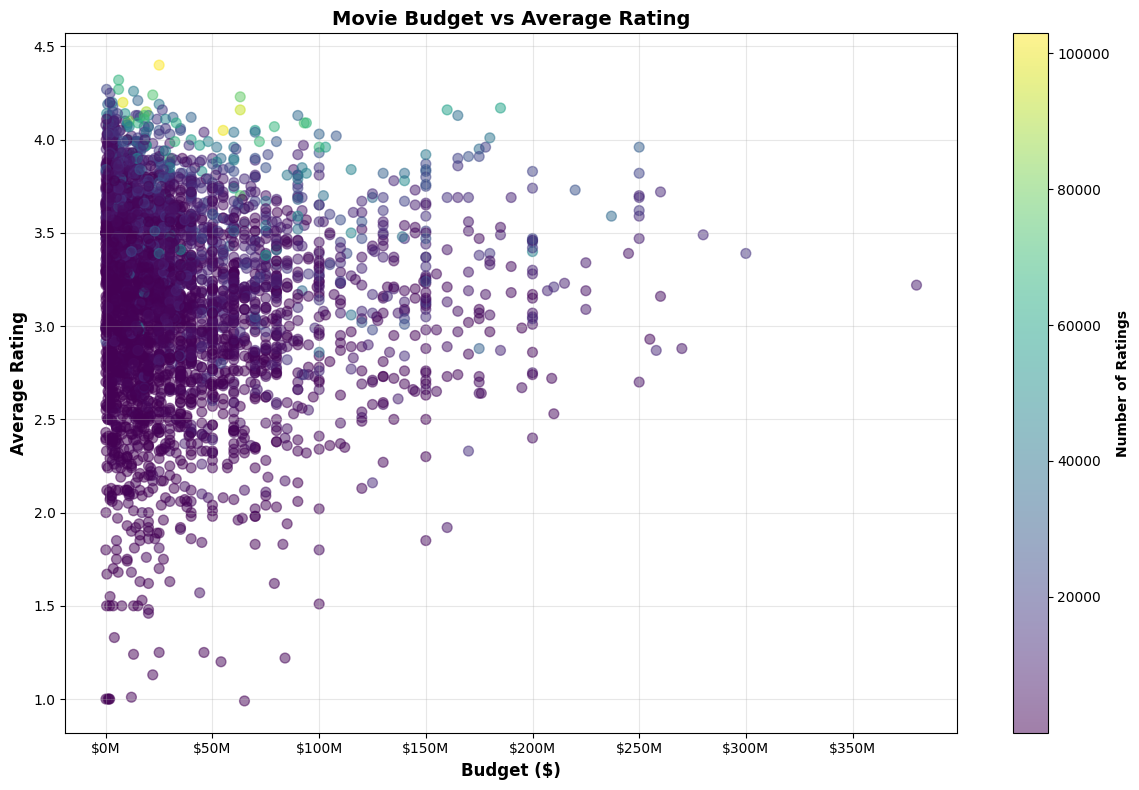

Scatter plot created successfully!
Total movies plotted: 3707
Budget range: $1 - $380,000,000
Rating range: 1.0 - 4.4


In [35]:
# Join with ratings and create scatter plot
print("\nJoining with ratings table")
print("=" * 100)

# 1. Calculate average rating per movie from ratings table
movie_avg_ratings = (
    ratings
    .group_by("movieId")
    .agg([
        pl.col("rating").mean().round(2).alias("avg_rating"),
        pl.col("rating").count().alias("num_ratings")
    ])
)

print(f"Movies with ratings: {len(movie_avg_ratings)}")
print()

# 2. Join links_with_metadata with ratings
final_data = (
    links_with_metadata
    .join(movie_avg_ratings, left_on="movieId", right_on="movieId", how="inner")
)

# Filter for movies with budget > 0
plot_data = final_data.filter(pl.col("budget") > 0)

print(f"Movies with budget and ratings: {len(plot_data)}")
print()

# 3. Create scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(
    plot_data["budget"],
    plot_data["avg_rating"],
    alpha=0.5,
    s=50,
    c=plot_data["num_ratings"],
    cmap="viridis"
)

ax.set_xlabel("Budget ($)", fontsize=12, fontweight="bold")
ax.set_ylabel("Average Rating", fontsize=12, fontweight="bold")
ax.set_title("Movie Budget vs Average Rating", fontsize=14, fontweight="bold")

ax.ticklabel_format(style="plain", axis="x")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x/1e6:.0f}M"))

ax.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Number of Ratings", fontweight="bold")

plt.tight_layout()
plt.show()

print("Scatter plot created successfully!")
print(f"Total movies plotted: {len(plot_data)}")
print(f"Budget range: ${plot_data['budget'].min():,.0f} - ${plot_data['budget'].max():,.0f}")
print(f"Rating range: {plot_data['avg_rating'].min():.1f} - {plot_data['avg_rating'].max():.1f}")
